In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing, Understanding and Exploration

####  Load dataset

In [3]:
df = pd.read_csv("data/US_Accidents_Dec20_updated.csv")

In [4]:
df.shape

(1516064, 47)

Reducing number of records

In [10]:
df = df[df['Start_Time']>"2019-01-01"]

In [11]:
df.shape

(1049704, 47)

In [12]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
237331,A-2953938,2,2020-11-01 22:33:04,2020-11-02 00:11:16,39.594265,-76.671599,39.588595,-76.675189,0.436,Incident on I-83 SB near EXIT 27 Road closed. ...,...,False,False,False,False,False,False,Night,Night,Night,Night
237332,A-2953939,2,2020-12-14 14:19:00,2020-12-14 17:06:29,37.701913,-121.910487,37.701983,-121.917087,0.361,WB 580 JEO 680. SV BIG RIG FB TRLR,...,False,False,False,False,False,False,Day,Day,Day,Day
237333,A-2953940,2,2020-12-31 19:20:00,2020-12-31 20:58:08,37.006813,-121.558409,37.002583,-121.556529,0.310,Incident on US-101 SB near CA-152 Right should...,...,False,False,False,False,False,False,Night,Night,Night,Night
237334,A-2953941,2,2020-10-15 23:03:55,2020-10-16 00:20:53,39.446521,-76.330792,39.455652,-76.312348,1.169,Incident on I-95 NB near EXIT 74 Drive with ca...,...,False,False,False,False,False,False,Night,Night,Night,Night
237335,A-2953942,2,2020-12-01 14:15:55,2020-12-01 16:15:42,39.221910,-76.801697,39.228970,-76.811217,0.705,Incident on MD-100 WB near EXIT 2 Drive with c...,...,False,False,False,False,False,False,Day,Day,Day,Day


#### Data description

In [13]:
print('Rows     :', df.shape[0])
print('Columns  :', df.shape[1])
print('\nFeatures :\n     :', df.columns.tolist())
print('\nMissing values    :', df.isnull().values.sum())
print('\nUnique values :  \n', df.nunique())

Rows     : 1049704
Columns  : 47

Features :
     : ['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

Missing values    : 1116622

Unique values :  
 ID                       1049704
Severity                       4
Start_Time                668731
End_Time                  793707
Start_Lat                 434614
Start_Lng                 442031
End_Lat                   432385
End_Lng   

### Data Cleaing

#### Drop features with high missing value rate and are not useful in our analysis and modeling

In [14]:
df.drop(['ID','Description','Country','Zipcode', 'Turning_Loop','Number','Street',
         'Airport_Code','Weather_Timestamp','Wind_Chill(F)','Wind_Direction',
        'Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight', 'Start_Lat', 
         'Start_Lng', 'End_Lat', 'End_Lng'], axis=1, inplace=True)
df.shape

(1049704, 29)

#### Missing values visualization

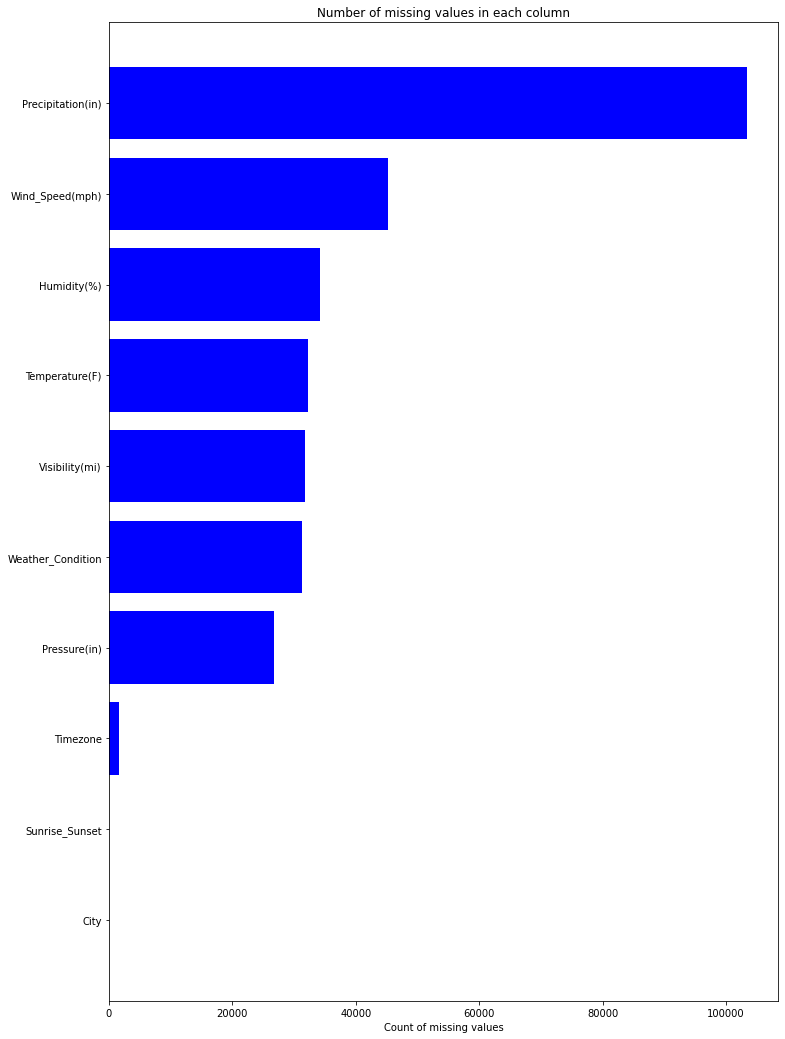

In [15]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.5
fig,ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind,missing_df.missing_count.values,color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

#### Fill missing values with proper values

In [16]:
df["Precipitation(in)"].fillna(0, inplace=True)
df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].median())
df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].median())
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].median())
df['Visibility(mi)'] = df['Visibility(mi)'].fillna(df['Visibility(mi)'].median())
df['Pressure(in)'] = df['Pressure(in)'].fillna(df['Pressure(in)'].median())

#### Drop the rest of missing values

In [17]:
df = df[df['Weather_Condition'].notna()]

In [18]:
df = df[df['City'].notna()]

In [19]:
df.isnull().sum()

Severity             0
Start_Time           0
End_Time             0
Distance(mi)         0
Side                 0
City                 0
County               0
State                0
Timezone             0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Sunrise_Sunset       0
dtype: int64

In [20]:
# new dataframe shape
df.shape

(1018307, 29)

### Analysis

We want to explore data to find features affecting the accident severity

In [21]:
df.groupby('Severity').size()

Severity
1     27791
2    865697
3     75055
4     49764
dtype: int64

#### As you can see dataset is imbalanced

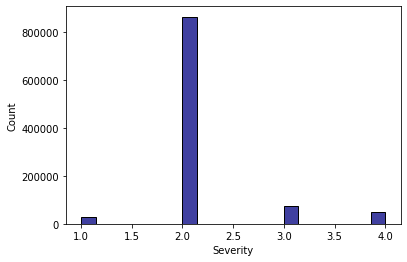

In [22]:
sev_p = sns.histplot(df, x="Severity", color = 'navy')

### Weather Condition Analysis

In [23]:
df.loc[df["Severity"] == 1]['Weather_Condition'].value_counts()

Fair                         13900
Mostly Cloudy                 4683
Cloudy                        3506
Partly Cloudy                 2648
Light Rain                    1385
Rain                           271
Fair / Windy                   231
Fog                            195
Mostly Cloudy / Windy          136
Partly Cloudy / Windy           85
Heavy Rain                      80
Light Drizzle                   75
Cloudy / Windy                  72
Haze                            70
Light Rain with Thunder         64
Light Snow                      64
T-Storm                         62
Heavy T-Storm                   45
Thunder                         45
Thunder in the Vicinity         30
Light Rain / Windy              29
Snow                            27
Rain / Windy                    13
Heavy Rain / Windy              10
Blowing Dust / Windy             8
Heavy T-Storm / Windy            7
Showers in the Vicinity          7
Light Rain Shower                6
Shallow Fog         

#### Find distribution of diffrent weather conditions

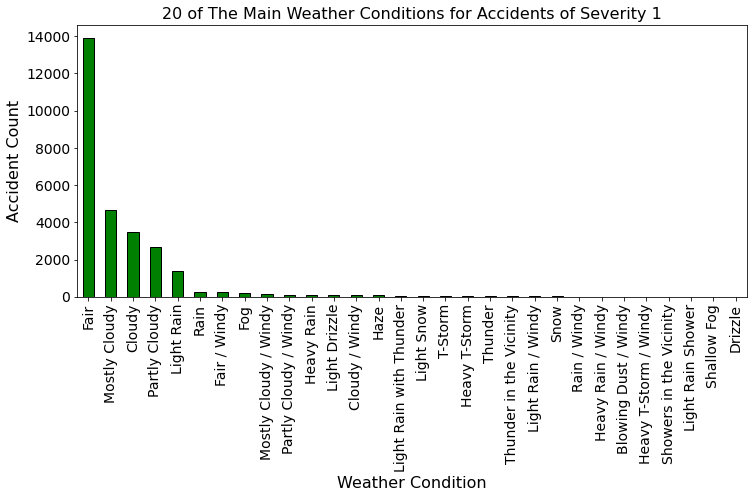

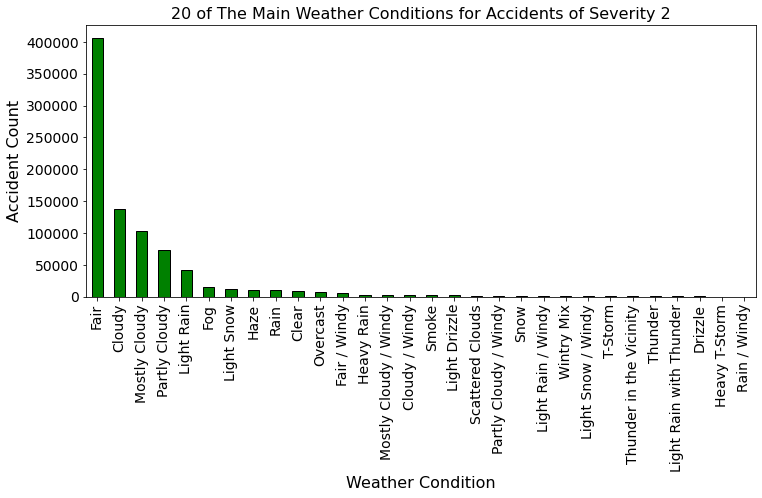

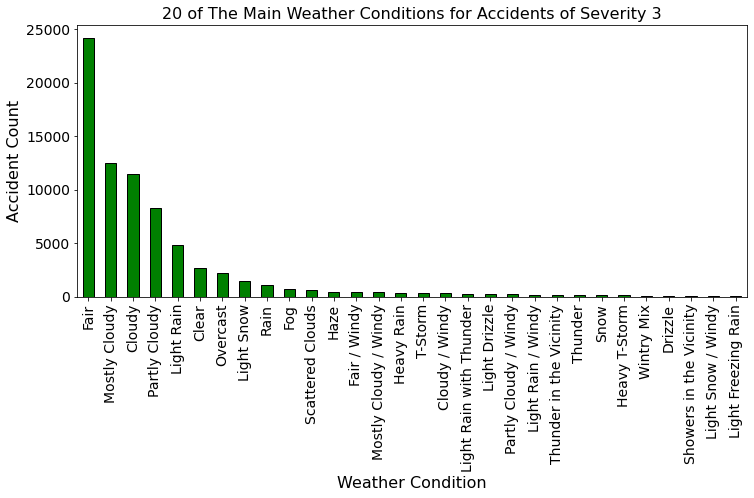

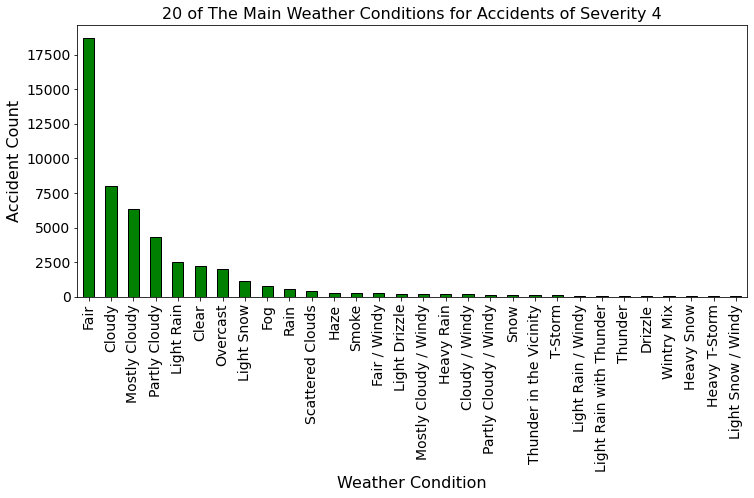

In [24]:
for s in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    df.loc[df["Severity"] == s]['Weather_Condition'].value_counts().sort_values(ascending=False).head(30).plot.bar(width=0.5,color='g',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('20 of The Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

####  Find distribution of diffrent Temperature

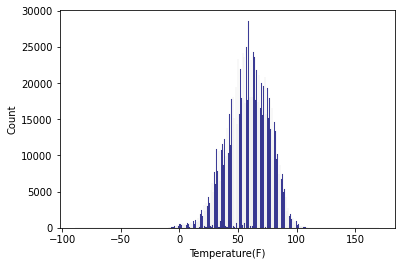

In [25]:
sev_tem = sns.histplot(df, x="Temperature(F)", color = 'navy')

#### Joint Distribution Temperature by Severity

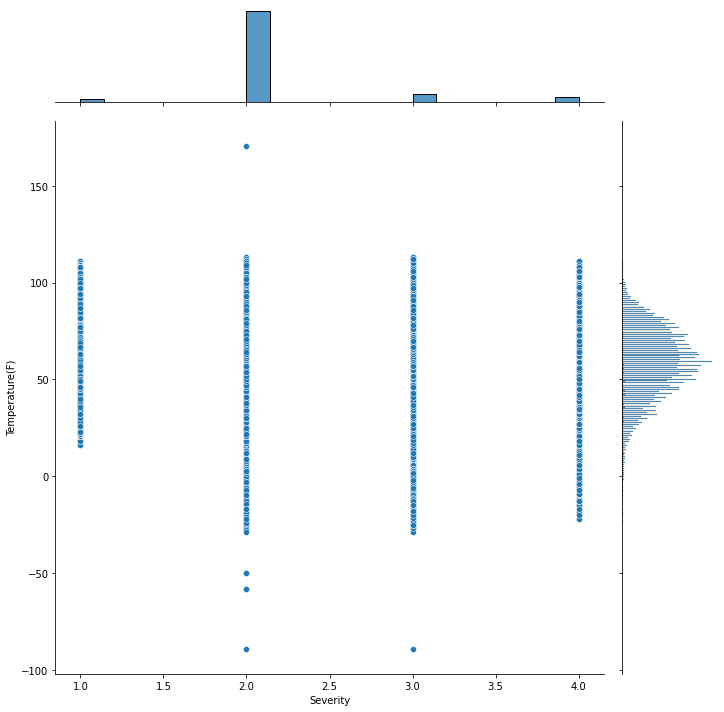

In [26]:
sns.jointplot(x = "Severity", y = "Temperature(F)", data = df, height=10)
plt.show()

As you can see cold weather increases the risk of accidents.

#### Joint Distribution Humidity by Severity

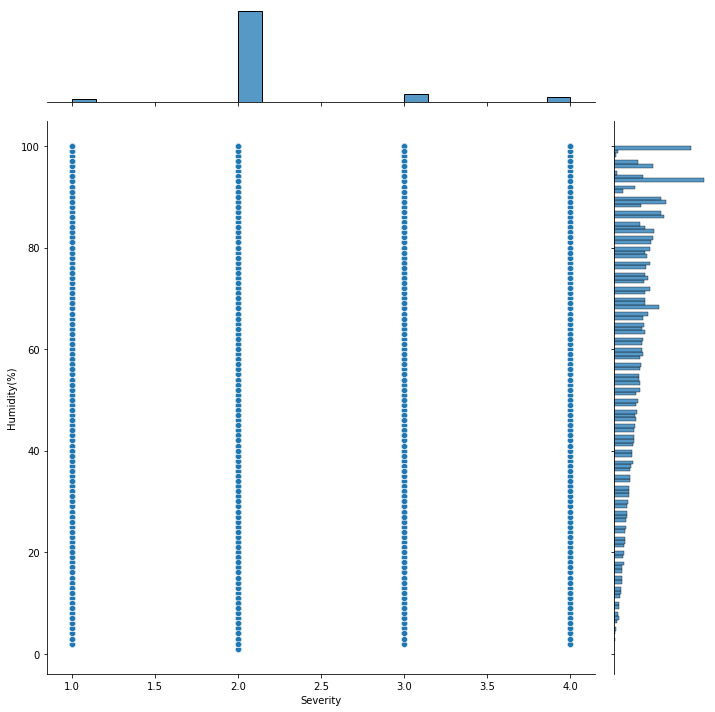

In [27]:
sns.jointplot(x = "Severity", y = "Humidity(%)", data = df, height=10)
plt.show()

As you can see more humidity increases the risk of accidents.

### Time Analysis
exploring the severty of accident by day of the week

In [28]:
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')

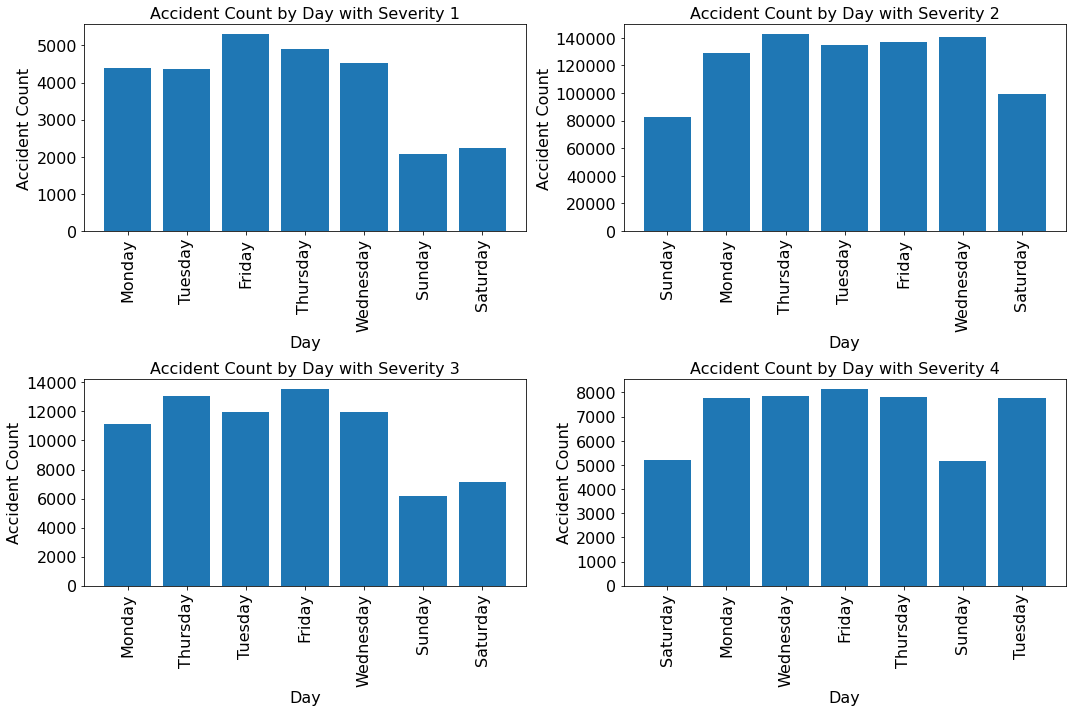

In [29]:
df['WeekDay'] = df['time'].dt.strftime('%A')
plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(df.loc[df["Severity"] == s]['WeekDay'], bins=[0,1,2,3,4,5,6,7], align='left', rwidth=0.8)
    plt.title("Accident Count by Day with Severity " + str(s), fontsize=16)
    plt.xticks(rotation = 90)
    plt.xlabel("Day", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

### Infrastructure Analysis

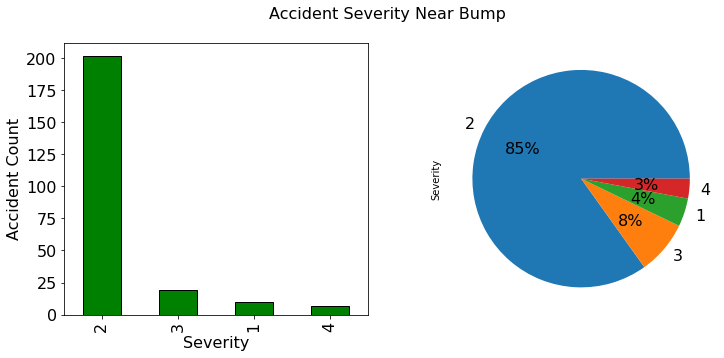

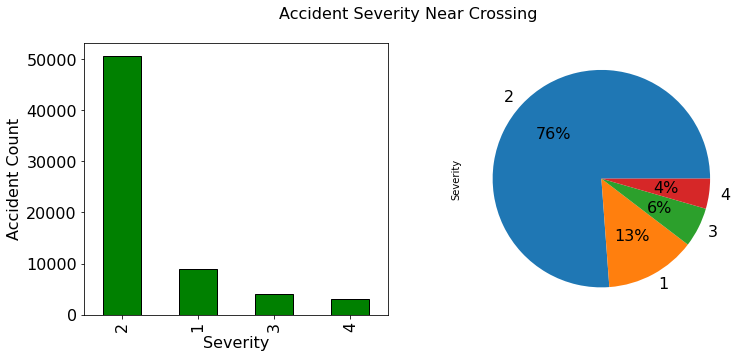

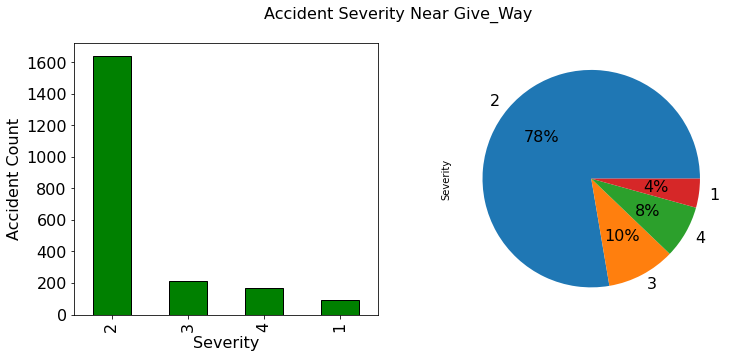

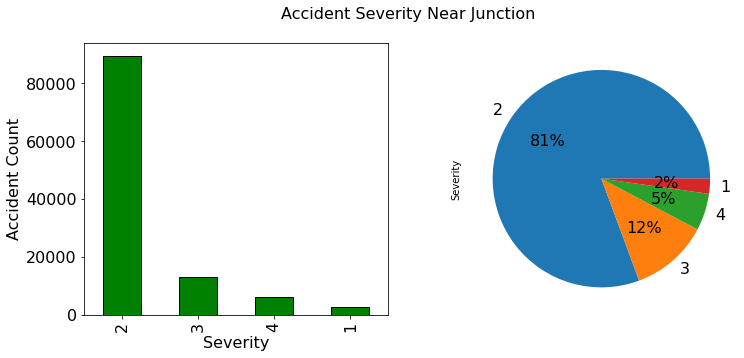

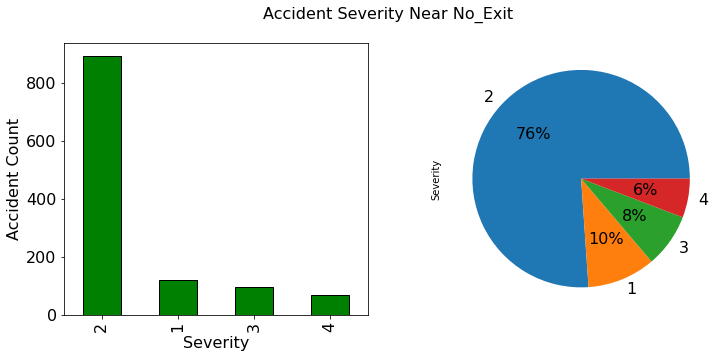

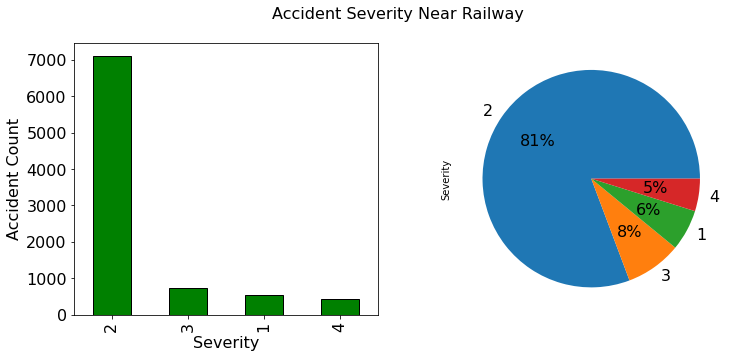

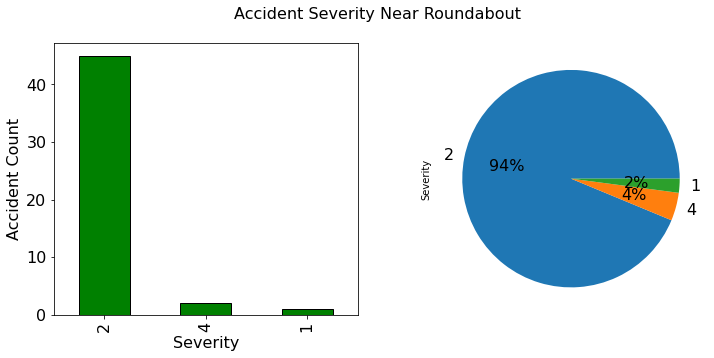

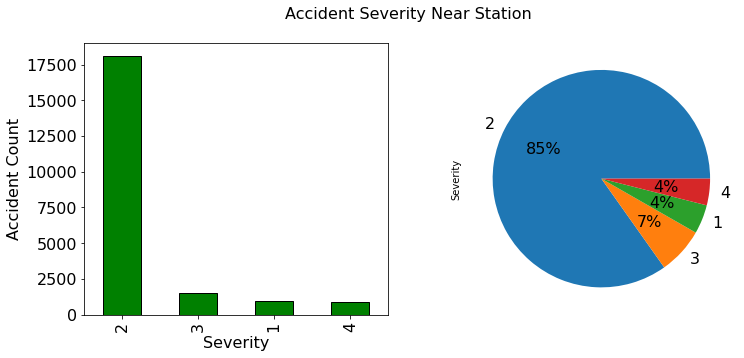

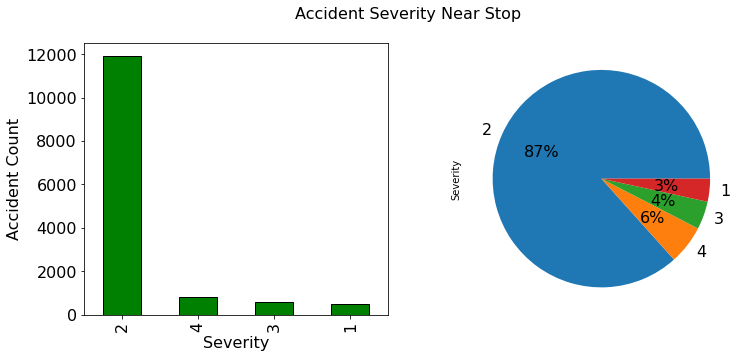

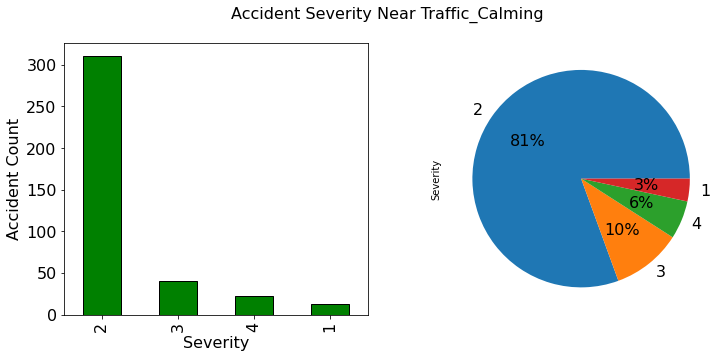

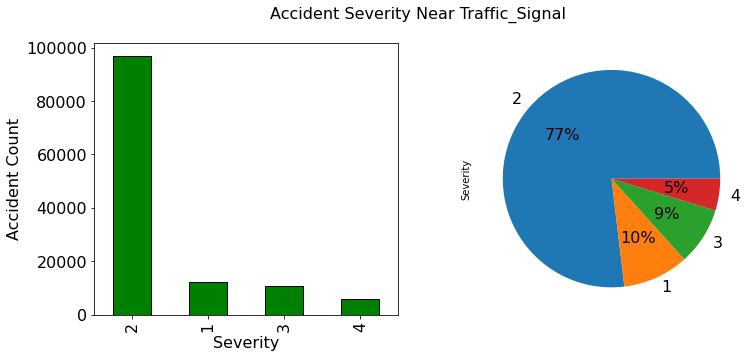

In [30]:
for s in ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']:
    # check if infrastructure type is found in any record 
    if (df[s] == True).sum() > 0:
        plt.subplots(1,2,figsize=(12,5))
        plt.xticks(fontsize=14)
        plt.suptitle('Accident Severity Near ' + s,fontsize=16)
        plt.subplot(1,2,1)
        df.loc[df[s] == True]['Severity'].value_counts().plot.bar(width=0.5,color='g',edgecolor='k',align='center',linewidth=1)
        plt.xlabel('Severity',fontsize=16)
        plt.ylabel('Accident Count',fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.subplot(1,2,2)
        df.loc[df[s] == True]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

### Geographical Analysis

#### Severity by each state

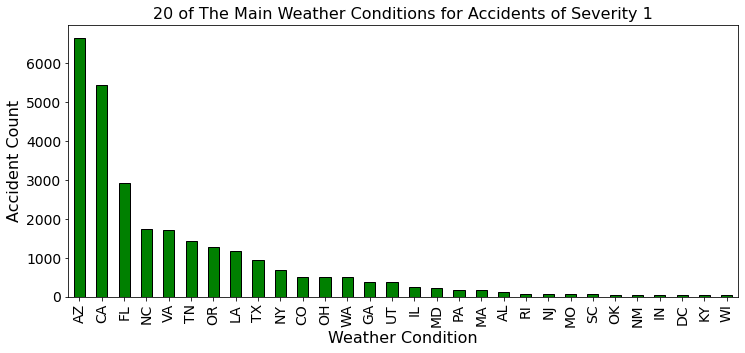

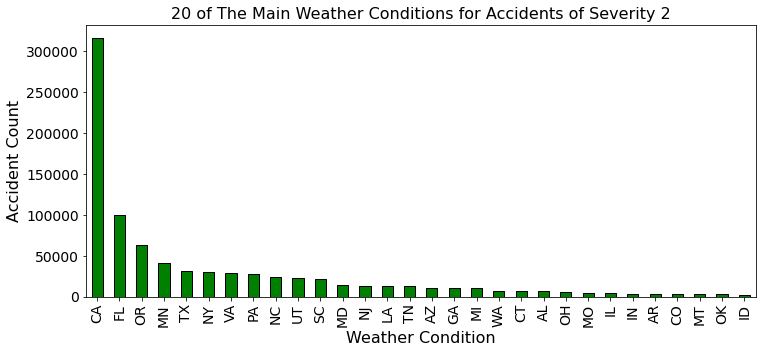

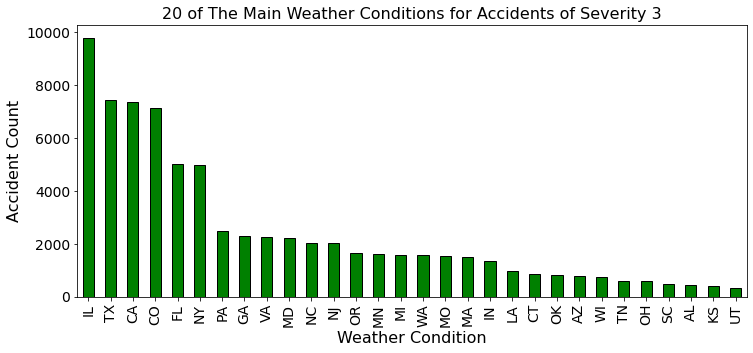

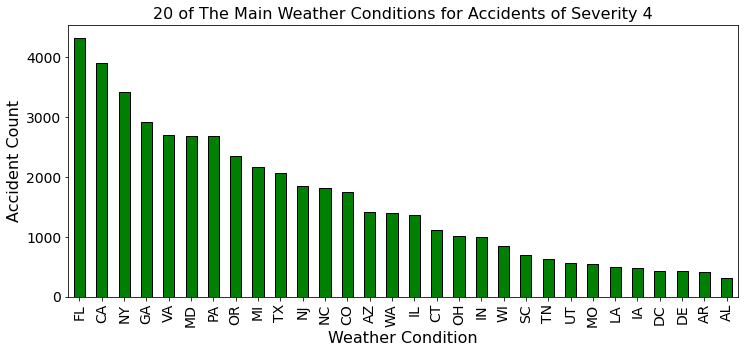

In [31]:
for s in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    df.loc[df["Severity"] == s]['State'].value_counts().sort_values(ascending=False).head(30).plot.bar(width=0.5,color='g',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('20 of The Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

## Feature Engineering

#### From the features related to time we just need day of the week.
Creating numeric value and drop the rest of columns

In [32]:
df['numeric_DayOfWeek'] = df['time'].dt.dayofweek

In [33]:
df['numeric_DayOfWeek'].head()

237331    6
237332    0
237333    3
237334    3
237335    1
Name: numeric_DayOfWeek, dtype: int64

Drop the rest of time columns

In [34]:
df.drop(['Start_Time', 'End_Time', 'time','Timezone','WeekDay'], axis=1, inplace=True)
df.shape

(1018307, 27)

Obviously, city and county are a subset of state, so we will drop those.

In [35]:
df.drop(['City','County'], axis=1, inplace=True)
df.shape

(1018307, 25)

In [36]:
df.columns

Index(['Severity', 'Distance(mi)', 'Side', 'State', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'numeric_DayOfWeek'],
      dtype='object')

### Handeling the Categorical data

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

#### Check the columns type

In [38]:
for i in df.columns:
    print(i+": "+str(df[i].dtype))

Severity: int64
Distance(mi): float64
Side: object
State: object
Temperature(F): float64
Humidity(%): float64
Pressure(in): float64
Visibility(mi): float64
Wind_Speed(mph): float64
Precipitation(in): float64
Weather_Condition: object
Amenity: bool
Bump: bool
Crossing: bool
Give_Way: bool
Junction: bool
No_Exit: bool
Railway: bool
Roundabout: bool
Station: bool
Stop: bool
Traffic_Calming: bool
Traffic_Signal: bool
Sunrise_Sunset: object
numeric_DayOfWeek: int64


#### Cleaning the Weather_Condition column

In [39]:
# List of unique value
df['Weather_Condition'].unique()

array(['Partly Cloudy / Windy', 'Fair', 'Cloudy', 'Mostly Cloudy',
       'Partly Cloudy', 'Cloudy / Windy', 'Light Rain', 'Rain', 'Mist',
       'Heavy Snow', 'Light Snow', 'Fog', 'Light Rain / Windy', 'Haze',
       'Smoke', 'Snow', 'Thunder in the Vicinity', 'Haze / Windy',
       'Fair / Windy', 'Mostly Cloudy / Windy', 'Wintry Mix',
       'Light Drizzle', 'T-Storm', 'Heavy Rain / Windy',
       'Light Snow / Windy', 'Heavy Rain', 'Light Rain Shower',
       'Smoke / Windy', 'N/A Precipitation', 'Thunder',
       'Light Drizzle / Windy', 'Patches of Fog', 'Drizzle',
       'Heavy Drizzle', 'Heavy T-Storm', 'Light Rain with Thunder',
       'Shallow Fog', 'Heavy Snow / Windy', 'Rain / Windy',
       'Snow / Windy', 'Fog / Windy', 'Partial Fog',
       'Light Freezing Rain / Windy', 'Sleet', 'Blowing Snow / Windy',
       'Showers in the Vicinity', 'Snow and Sleet',
       'Snow and Sleet / Windy', 'Squalls / Windy', 'Light Freezing Rain',
       'Wintry Mix / Windy', 'Blowing Dust 

In [40]:
df['Weather_Condition'].nunique()

101

#### Categorizing conditions based on their severity

In [41]:
df['Weather_Condition'][df['Weather_Condition'].str.contains('Rain')].nunique()

19

In [42]:
df.loc[df['Weather_Condition'].str.contains('Rain'), 'Weather_Condition'] = "Rainy"
df.loc[df['Weather_Condition'].str.contains('Showers'), 'Weather_Condition'] = "Rainy"
df.loc[df['Weather_Condition'].str.contains('Hail'), 'Weather_Condition'] = "Rainy"

In [43]:
df['Weather_Condition'][df['Weather_Condition'].str.contains('Snow')].nunique()

19

In [44]:
df.loc[df['Weather_Condition'].str.contains('Snow'), 'Weather_Condition'] = "Snowy"
df.loc[df['Weather_Condition'].str.contains('Ice'), 'Weather_Condition'] = "Snowy"
df.loc[df['Weather_Condition'].str.contains('Sleet'), 'Weather_Condition'] = "Snowy"

In [45]:
df['Weather_Condition'][df['Weather_Condition'].str.contains('Windy')].nunique()

18

In [46]:
df.loc[df['Weather_Condition'].str.contains('Windy'), 'Weather_Condition'] = "Windy"

In [47]:
df['Weather_Condition'][df['Weather_Condition'].str.contains('Thunder')].nunique()

3

In [48]:
df.loc[df['Weather_Condition'].str.contains('Thunder'), 'Weather_Condition'] = "Thunderstorm"
df.loc[df['Weather_Condition'].str.contains('Storm'), 'Weather_Condition'] = "Thunderstorm"

In [49]:
df['Weather_Condition'][df['Weather_Condition'].str.contains('Cloudy')].nunique()

3

In [50]:
df.loc[df['Weather_Condition'].str.contains('Cloudy'), 'Weather_Condition'] = "Cloudy"

In [51]:
df['Weather_Condition'][df['Weather_Condition'].str.contains('Drizzle')].nunique()

7

In [52]:
df.loc[df['Weather_Condition'].str.contains('Drizzle'), 'Weather_Condition'] = "Drizzle"

In [53]:
df.loc[df['Weather_Condition'].str.contains('Fog'), 'Weather_Condition'] = "Foggy"
df.loc[df['Weather_Condition'].str.contains('Dust'), 'Weather_Condition'] = "Foggy"
df.loc[df['Weather_Condition'].str.contains('Smoke'), 'Weather_Condition'] = "Foggy"
df.loc[df['Weather_Condition'].str.contains('Haze'), 'Weather_Condition'] = "Foggy"
df.loc[df['Weather_Condition'].str.contains('Mist'), 'Weather_Condition'] = "Foggy"

In [54]:
df.loc[df['Weather_Condition'].str.contains('Clouds'), 'Weather_Condition'] = "Fair"
df.loc[df['Weather_Condition'].str.contains('Precipitation'), 'Weather_Condition'] = "Fair"
df.loc[df['Weather_Condition'].str.contains('Wintry Mix'), 'Weather_Condition'] = "Fair"

In [55]:
df['Weather_Condition'].unique()

array(['Windy', 'Fair', 'Cloudy', 'Rainy', 'Foggy', 'Snowy',
       'Thunderstorm', 'Drizzle', 'Overcast', 'Clear', 'Tornado'],
      dtype=object)

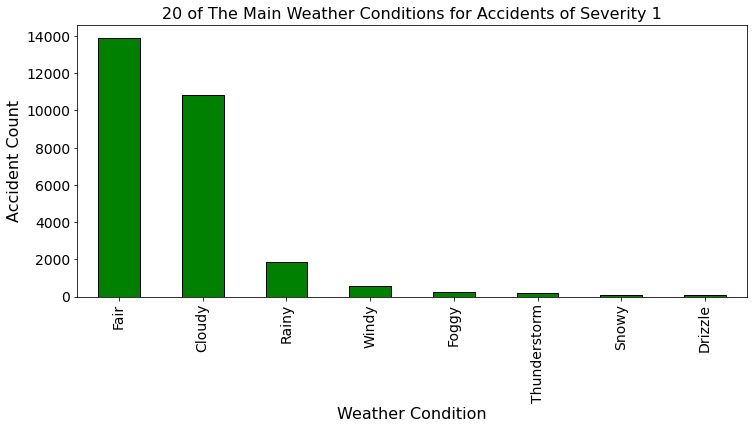

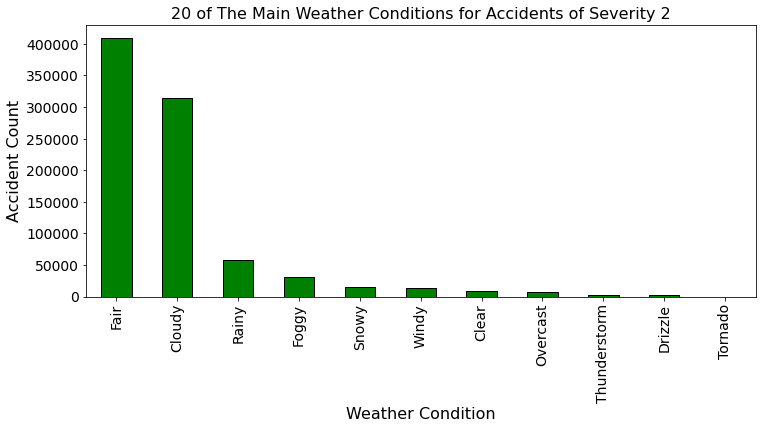

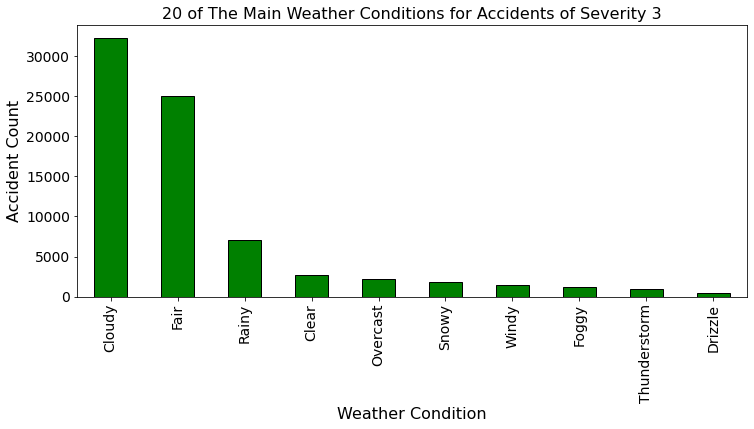

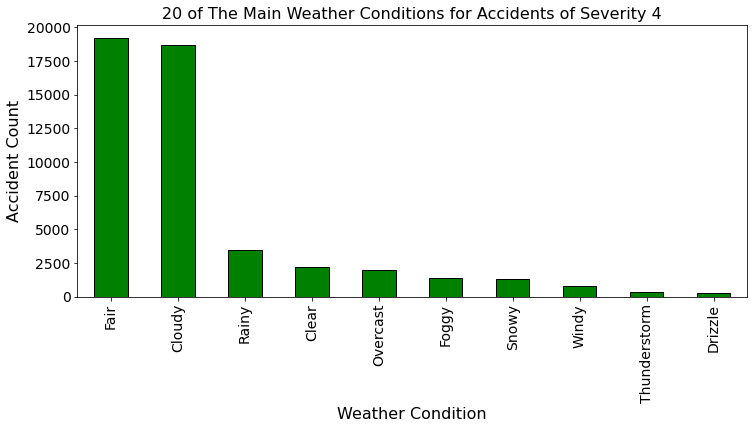

In [56]:
for s in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    df.loc[df["Severity"] == s]['Weather_Condition'].value_counts().sort_values(ascending=False).head(30).plot.bar(width=0.5,color='g',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('20 of The Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

#### Explore cleaned weather conditions on number of accidents by Severty

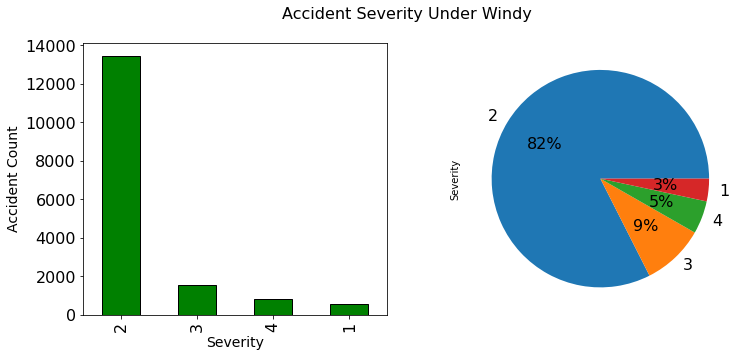

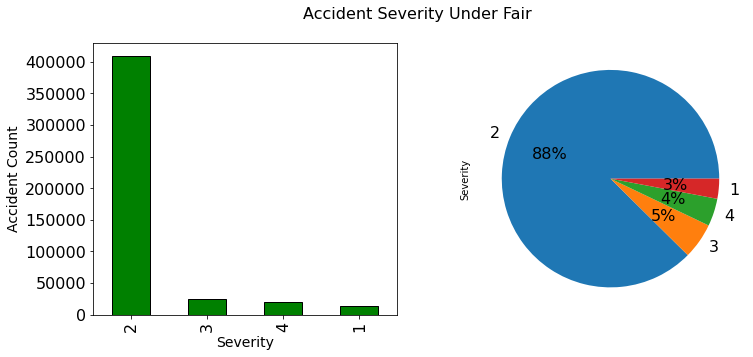

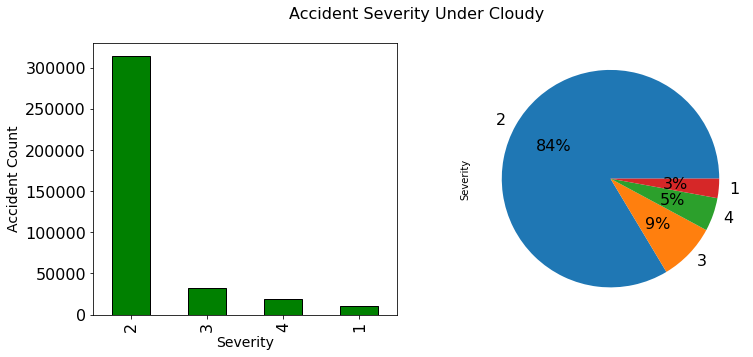

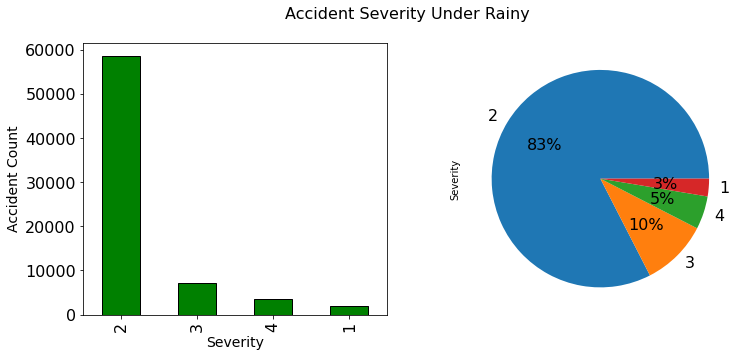

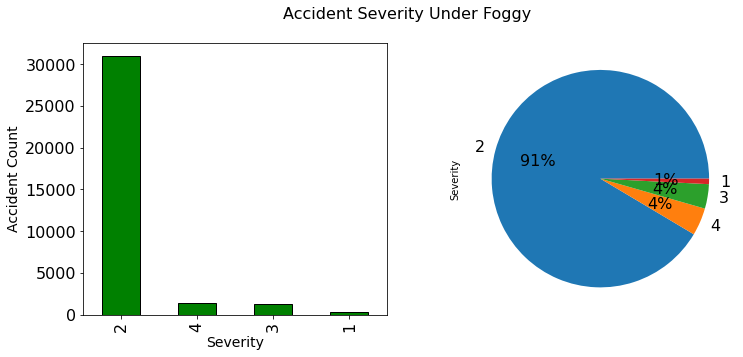

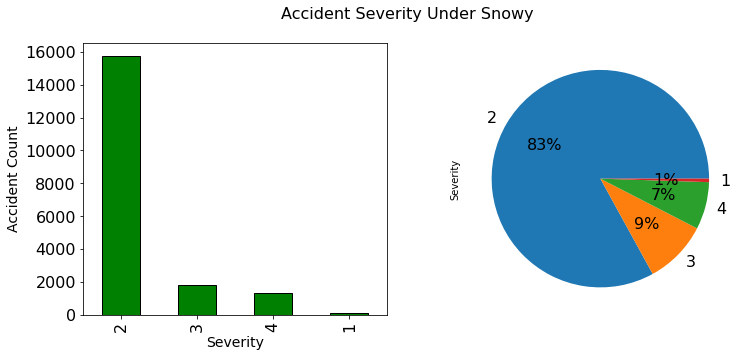

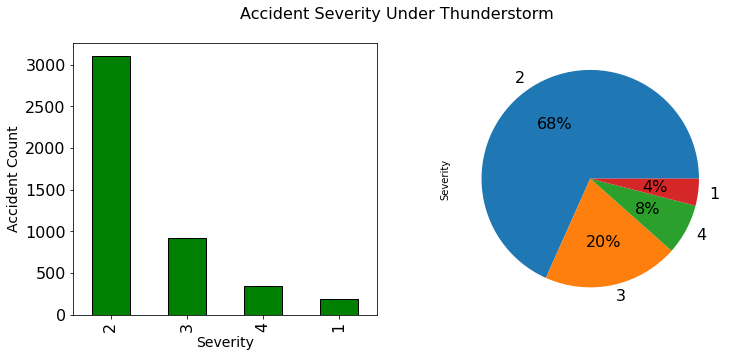

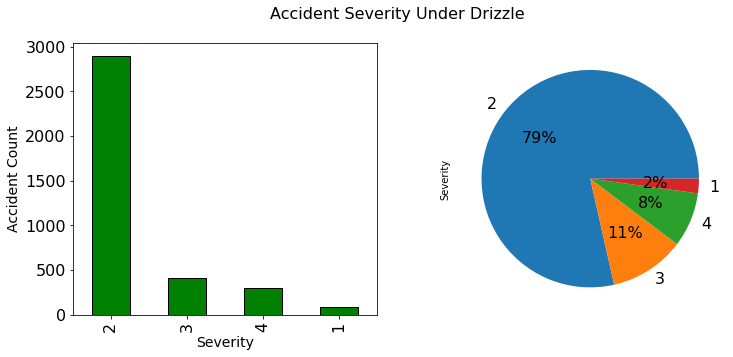

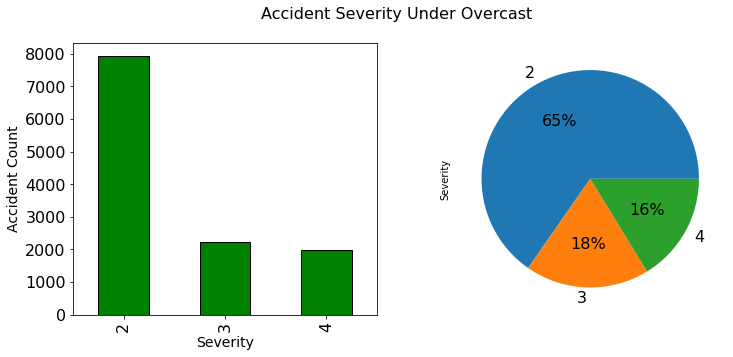

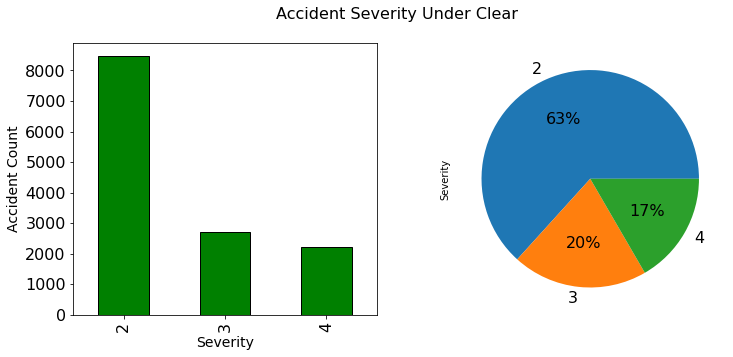

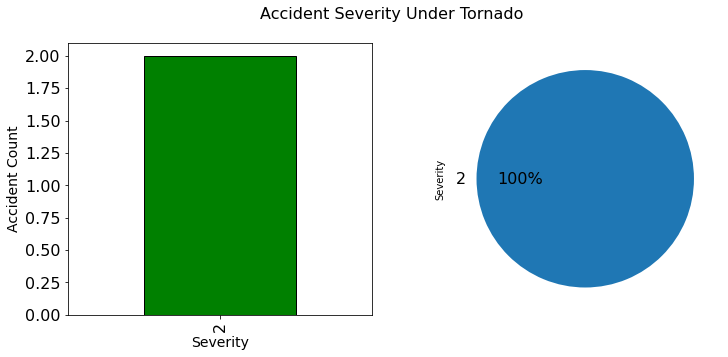

In [57]:
for s in df['Weather_Condition'].unique():
    plt.subplots(1,2,figsize=(12,5))
    plt.suptitle('Accident Severity Under ' + s,fontsize=16)
    plt.subplot(1,2,1)
    df.loc[df["Weather_Condition"] == s]['Severity'].value_counts().plot.bar(width=0.5,color='g',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Severity',fontsize=14)
    plt.ylabel('Accident Count',fontsize=14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.subplot(1,2,2)
    df.loc[df["Weather_Condition"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

#### Distance feature

#### defining the major severity by analyzing the length of the road extent affected by the accident. Actually, accidents that affected more length of the road, had more severity

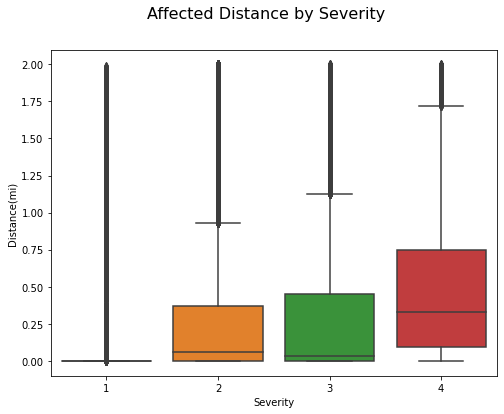

In [65]:
fig, axs = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Severity", y="Distance(mi)", 
            data=df.loc[df['Distance(mi)']<2],ax=axs)
fig.suptitle('Affected Distance by Severity', fontsize=16)

plt.show()

#### Remove outliers

In [67]:
from scipy import stats

In [68]:
df = df[(np.abs(stats.zscore(df['Distance(mi)'])) < 3)]

In [69]:
df.shape

(1005952, 24)

#### Label encoding for converting categorical features to numerical

As you can see Weather_Condition is not a good feature, because the most of accident in all severity occurred in fair weather

In [ ]:
df.drop(['Weather_Condition'], axis=1, inplace=True)

In [59]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [60]:
df['Amenity_num'] = labelencoder.fit_transform(df['Amenity'])
df['Bump_num'] = labelencoder.fit_transform(df['Bump'])
df['Crossing_num'] = labelencoder.fit_transform(df['Crossing'])
df['Give_Way_num'] = labelencoder.fit_transform(df['Give_Way'])
df['Junction_num'] = labelencoder.fit_transform(df['Junction'])
df['No_Exit_num'] = labelencoder.fit_transform(df['No_Exit'])
df['Railway_num'] = labelencoder.fit_transform(df['Railway'])
df['Roundabout_num'] = labelencoder.fit_transform(df['Roundabout'])
df['Station_num'] = labelencoder.fit_transform(df['Station'])
df['Stop_num'] = labelencoder.fit_transform(df['Stop'])
df['Traffic_Calming_num'] = labelencoder.fit_transform(df['Traffic_Calming'])
df['Traffic_Signal_num'] = labelencoder.fit_transform(df['Traffic_Signal'])
df['Side_num'] = labelencoder.fit_transform(df['Side'])
df['State_num'] = labelencoder.fit_transform(df['State'])
df['Sunrise_Sunset_num'] = labelencoder.fit_transform(df['Sunrise_Sunset'])

In [61]:
# Check columns again
df.columns

Index(['Severity', 'Distance(mi)', 'Side', 'State', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'numeric_DayOfWeek', 'Amenity_num', 'Bump_num', 'Crossing_num',
       'Give_Way_num', 'Junction_num', 'No_Exit_num', 'Railway_num',
       'Roundabout_num', 'Station_num', 'Stop_num', 'Traffic_Calming_num',
       'Traffic_Signal_num', 'Side_num', 'State_num', 'Sunrise_Sunset_num'],
      dtype='object')

In [62]:
for i in df.columns:
    print(i+": "+str(df[i].dtype))

Severity: int64
Distance(mi): float64
Side: object
State: object
Temperature(F): float64
Humidity(%): float64
Pressure(in): float64
Visibility(mi): float64
Wind_Speed(mph): float64
Precipitation(in): float64
Amenity: bool
Bump: bool
Crossing: bool
Give_Way: bool
Junction: bool
No_Exit: bool
Railway: bool
Roundabout: bool
Station: bool
Stop: bool
Traffic_Calming: bool
Traffic_Signal: bool
Sunrise_Sunset: object
numeric_DayOfWeek: int64
Amenity_num: int64
Bump_num: int64
Crossing_num: int64
Give_Way_num: int64
Junction_num: int64
No_Exit_num: int64
Railway_num: int64
Roundabout_num: int64
Station_num: int64
Stop_num: int64
Traffic_Calming_num: int64
Traffic_Signal_num: int64
Side_num: int32
State_num: int32
Sunrise_Sunset_num: int32


In [63]:
# Drop original categorical features
df.drop(["Sunrise_Sunset","Amenity","Bump","Crossing","Give_Way",
         "Junction","No_Exit","Railway","Roundabout","Station","Stop",
         "Traffic_Calming","Traffic_Signal","Side","State"], axis=1, inplace=True)

In [71]:
for i in df.columns:
    print(i+": "+str(df[i].dtype))

Severity: int64
Distance(mi): float64
Temperature(F): float64
Humidity(%): float64
Pressure(in): float64
Visibility(mi): float64
Wind_Speed(mph): float64
Precipitation(in): float64
numeric_DayOfWeek: int64
Amenity_num: int64
Bump_num: int64
Crossing_num: int64
Give_Way_num: int64
Junction_num: int64
No_Exit_num: int64
Railway_num: int64
Roundabout_num: int64
Station_num: int64
Stop_num: int64
Traffic_Calming_num: int64
Traffic_Signal_num: int64
Side_num: int32
State_num: int32
Sunrise_Sunset_num: int32


### Class labels

In this study we want to find the major severity and split our target in two class

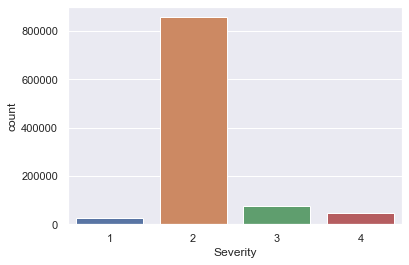

In [72]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Severity", data=df)

Based on the result, the accidents with severity level 4 are much more serious than accidents of other levels. So I want to slit up the levels of severity into two levels, level 3 and 4 and other levels.

In [73]:
df['FinalSeverity'] = 0
df.loc[df['Severity'] == 4, 'FinalSeverity'] = 1
df.loc[df['Severity'] == 3, 'FinalSeverity'] = 1
df = df.drop(['Severity'], axis = 1)
df.FinalSeverity.value_counts()

0    885103
1    120849
Name: FinalSeverity, dtype: int64

### Find Correlation between features

It is important to discover and quantify the degree to which variables in your dataset are dependent upon each other. This knowledge can help us better prepare our data to meet the expectations of machine learning algorithms, such as linear regression, whose performance will degrade with the presence of these interdependencies.
The performance of some algorithms can deteriorate if two or more variables are tightly related, called multicollinearity.

In [74]:
df.corr()

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),numeric_DayOfWeek,Amenity_num,Bump_num,...,Railway_num,Roundabout_num,Station_num,Stop_num,Traffic_Calming_num,Traffic_Signal_num,Side_num,State_num,Sunrise_Sunset_num,FinalSeverity
Distance(mi),1.000000,-0.068558,0.072061,-0.018514,-0.020569,-0.005192,0.001589,-0.005264,-0.036693,-0.004632,...,-0.026840,-0.003363,-0.059054,-0.028779,-0.005908,-0.149900,0.121823,0.108398,0.080197,0.071457
Temperature(F),-0.068558,1.000000,-0.409422,0.095082,0.192804,0.101342,-0.003659,-0.006587,0.010731,0.002052,...,0.008834,0.004653,0.057124,-0.006337,0.002527,0.102050,-0.013657,-0.222526,-0.346778,0.039345
Humidity(%),0.072061,-0.409422,1.000000,0.177801,-0.351901,-0.165880,0.086204,0.049581,-0.004025,-0.005429,...,-0.001907,0.003442,-0.001706,-0.008778,-0.004094,-0.069104,-0.006697,0.146913,0.326304,-0.005453
Pressure(in),-0.018514,0.095082,0.177801,1.000000,-0.019326,-0.062974,0.002105,-0.010667,0.015854,0.001346,...,0.021475,0.000992,0.052328,0.001588,0.003964,-0.005992,0.000225,-0.102390,0.039793,-0.053060
Visibility(mi),-0.020569,0.192804,-0.351901,-0.019326,1.000000,0.034094,-0.126230,-0.000117,0.006664,0.003212,...,0.002624,0.000221,0.017866,0.001128,0.002946,0.043632,-0.013134,-0.034063,-0.044691,0.021535
Wind_Speed(mph),-0.005192,0.101342,-0.165880,-0.062974,0.034094,1.000000,0.029085,-0.046645,0.004688,0.000065,...,-0.002306,-0.001029,0.025551,-0.009931,-0.000706,0.042706,-0.016719,0.085196,-0.248826,0.081944
Precipitation(in),0.001589,-0.003659,0.086204,0.002105,-0.126230,0.029085,1.000000,-0.001208,-0.001668,-0.000261,...,-0.001144,-0.000532,-0.002011,-0.004072,-0.000410,-0.007309,0.008140,0.009075,-0.008287,0.012242
numeric_DayOfWeek,-0.005264,-0.006587,0.049581,-0.010667,-0.000117,-0.046645,-0.001208,1.000000,-0.002050,-0.001705,...,0.001176,0.002394,-0.005493,0.005175,-0.001698,-0.021401,-0.000492,-0.010505,0.067651,-0.005627
Amenity_num,-0.036693,0.010731,-0.004025,0.015854,0.006664,0.004688,-0.001668,-0.002050,1.000000,0.005429,...,0.037718,0.000865,0.125476,0.025741,0.010546,0.092548,-0.057360,0.027663,-0.007982,0.004591
Bump_num,-0.004632,0.002052,-0.005429,0.001346,0.003212,0.000065,-0.000261,-0.001705,0.005429,1.000000,...,0.007645,-0.000106,0.004969,0.013384,0.783254,-0.003229,-0.002981,-0.007207,0.002663,-0.000446


Text(0.5, 1.0, 'Correlation Heatmap')

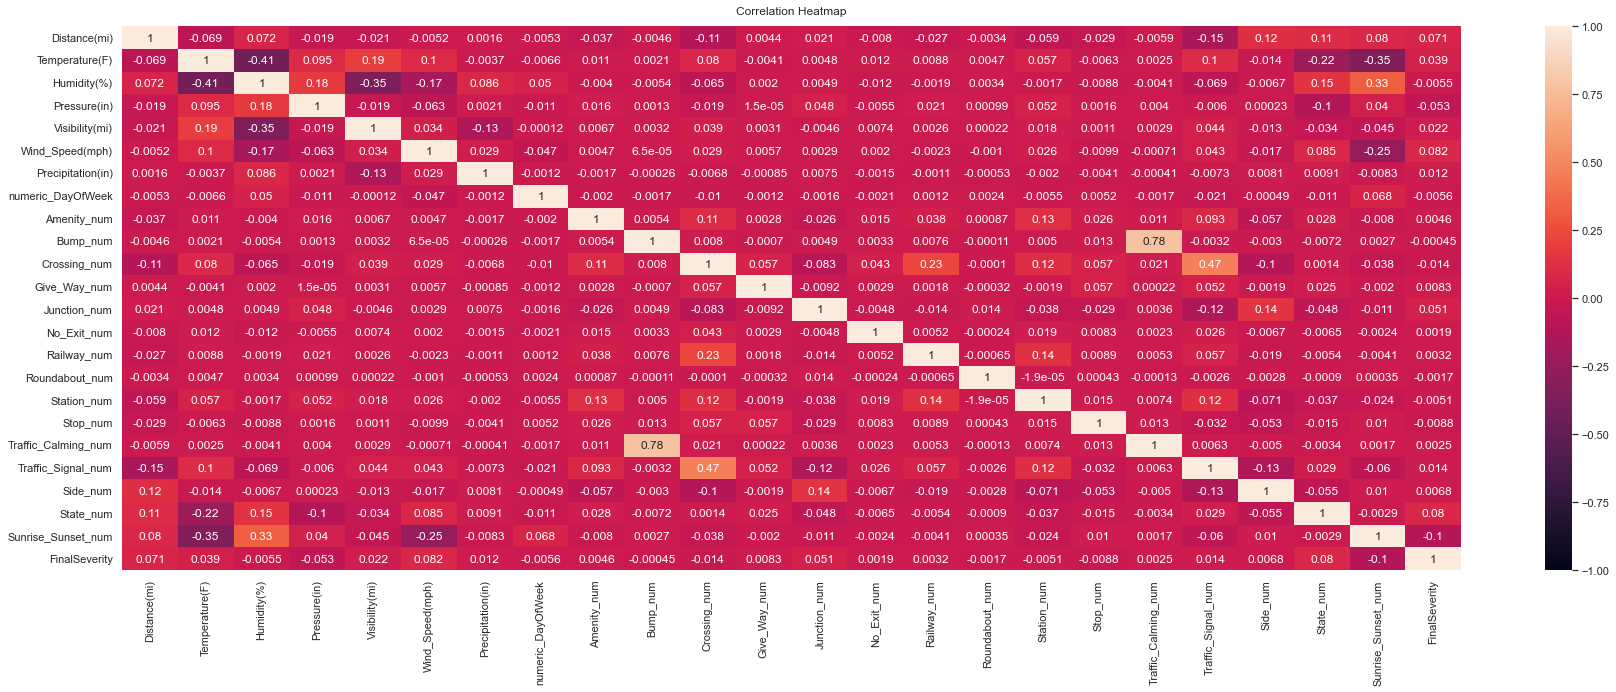

In [75]:
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Correlations are acceptable

## Data Preparation for Modeling

import packages

In [76]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_predict,RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import precision_score, recall_score, f1_score,RocCurveDisplay,plot_roc_curve

In [77]:
X = df.drop('FinalSeverity', axis=1)
y= df['FinalSeverity']

#### Check if the target label is balanced

In [78]:
df.groupby('FinalSeverity').size()

FinalSeverity
0    885103
1    120849
dtype: int64

#### Data is imbalanced 

# Modeling

## Under-sampling

#### As you can see the dataset is not balanced and we need to figure it out, we will use under-sampling technique to address this issue

In [79]:
undersample = RandomUnderSampler(sampling_strategy='majority')

In [80]:
# fit and apply the transform
X_res, y_res = undersample.fit_resample(X, y)

In [82]:
print ("Distribution of class labels before resampling {}".format(Counter(y)))
print ("Distribution of class labels after resampling {}".format(Counter(y_res)))

Distribution of class labels before resampling Counter({0: 885103, 1: 120849})
Distribution of class labels after resampling Counter({0: 120849, 1: 120849})


### Splitting Train Test

In [83]:
# split train, test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

After resampling, we are going to make model. In this study we will use Logistic Regression and Random Forest

### Create a function to compare Logistic Regression and Random Forest

In [84]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=6000), 
          # Maximum number of iterations taken for the solvers to converge
          # ConvergenceWarning: lbfgs failed to converge --> increased by 6000
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [85]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.6211005378568474,
 'Random Forest': 0.8167149358709144}

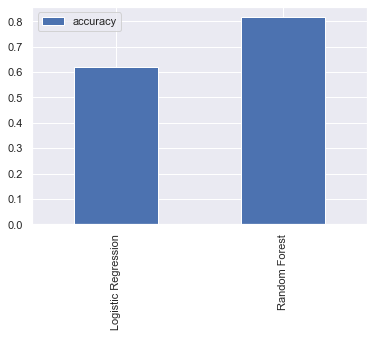

In [92]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

#### As you can see the Random Forest has better performance, so we'll pick Random Forest for creating our model

We will ignore the tuning model.

In [86]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8157426561853538

## Evaluating

In [87]:
# Make preidctions on test data
y_preds_rf = rf.predict(X_test)

#### Confusion Matrix

confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions

In [88]:
# Display confusion Matrix
print("Confusion Matrix - RF")
print(confusion_matrix(y_test, y_preds_rf))

Confusion Matrix - RF
[[19088  4883]
 [ 4024 20345]]


Text(66.5, 0.5, 'predicted label')

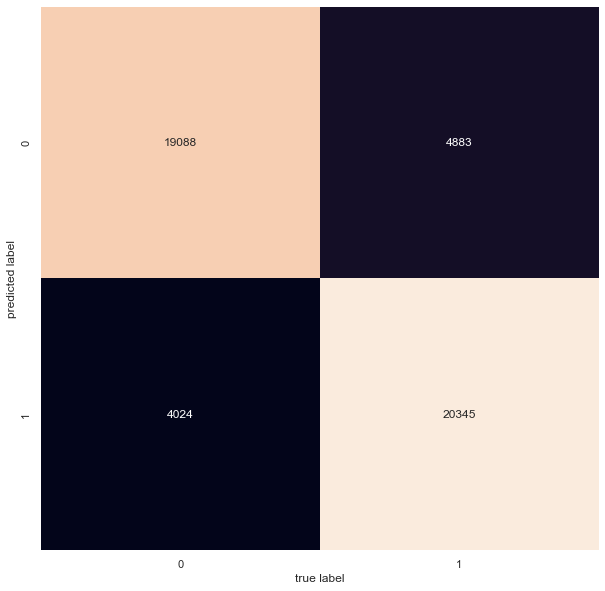

In [89]:
# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(confusion_matrix(y_test, y_preds_rf),
                annot=True, # Annotate the boxes
                cbar=False,
                fmt='g')
plt.xlabel("true label")
plt.ylabel("predicted label")

#### ROC Curve and AUC Scores

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

d:\sources\kdd_project\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


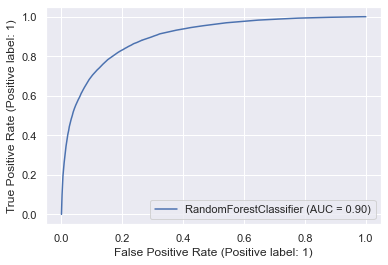

In [90]:
plot_roc_curve(rf, X_test, y_test);

#### Classification Report

A classification report will also give us information of the precision and recall of our model for each class.

In [91]:
print(classification_report(y_test, y_preds_rf))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81     23971
           1       0.81      0.83      0.82     24369

    accuracy                           0.82     48340
   macro avg       0.82      0.82      0.82     48340
weighted avg       0.82      0.82      0.82     48340



## Feature importance

### Random Forest Built-in Feature Importance

#### The Random Forest algorithm has built-in feature importance which can be computed in this ways:

Gini importance (or mean decrease impurity), which is computed from the Random Forest structure. It is a set of Decision Trees. Each Decision Tree is a set of internal nodes and leaves. In the internal node, the selected feature is used to make decision how to divide the data set into two separate sets with similars responses within. The features for internal nodes are selected with some criterion, which for classification tasks can be gini impurity or infomation gain, and for regression is variance reduction. We can measure how each feature decrease the impurity of the split (the feature with highest decrease is selected for internal node). For each feature we can collect how on average it decreases the impurity. The average over all trees in the forest is the measure of the feature importance. This method is available in scikit-learn implementation of the Random Forest (for both classifier and regressor). It is worth to mention, that in this method we should look at relative values of the computed importances. This biggest advantage of this method is a speed of computation - all needed values are computed during the Radom Forest training. The drawbacks of the method is to tendency to prefer (select as important) numerical features and categorical features with high cardinality. What is more, in the case of correlated features it can select one of the feature and neglect the importance of the second one.


In [92]:
from sklearn.inspection import permutation_importance

In [93]:
rf.feature_importances_

array([1.38336249e-01, 1.27023489e-01, 1.13109615e-01, 1.58096715e-01,
       2.66727078e-02, 8.50129422e-02, 1.27483143e-02, 5.62909972e-02,
       1.85638146e-03, 8.74904504e-05, 5.32192122e-03, 7.05736093e-04,
       9.86641138e-03, 3.84424792e-04, 1.61669019e-03, 3.55714706e-05,
       3.19168111e-03, 2.52706656e-03, 1.81972576e-04, 9.08946000e-03,
       1.02156055e-02, 2.15359812e-01, 2.22687457e-02])

Plot Features Importance

Text(0.5, 0, 'Random Forest Feature Importance')

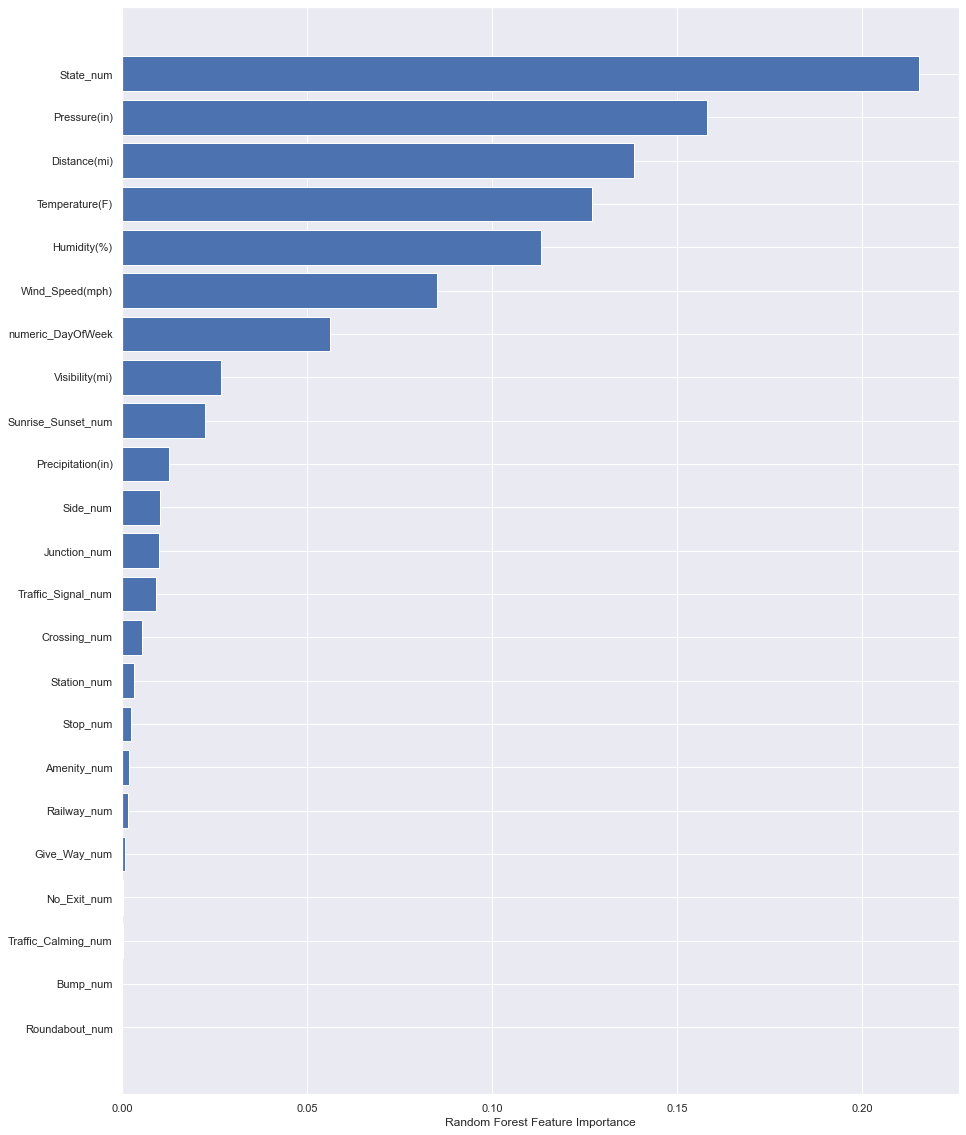

In [94]:
sorted_idx = rf.feature_importances_.argsort()

plt.figure(figsize=(15,20))
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Permutation Based Feature Importance

The permutation based importance can be used to overcome drawbacks of default feature importance computed with mean impurity decrease. This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.


In [95]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf, X_test, y_test)

Plot Permutation Based Features Importance

Text(0.5, 0, 'Permutation Importance')

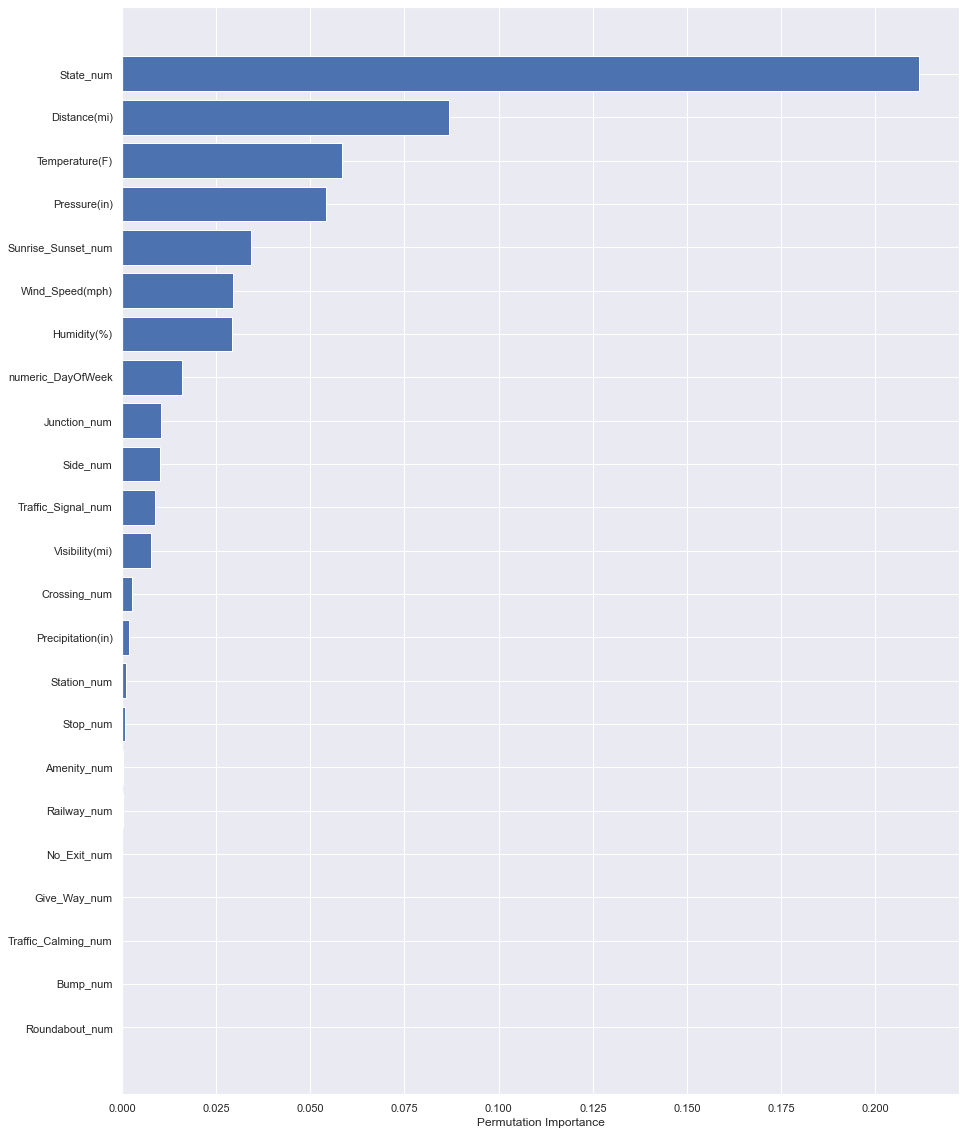

In [96]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,20))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
